In [172]:
import pandas as pd 
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold


# single model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Ensemble Learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score




# feature selection

In [173]:
data = pd.read_csv('Data_DropOutALL.csv', index_col=0)
data.head()

,STATUSTEXT,GPA,ENTRYGPA,STUDENTSEX,FATHERINCOME,YEARFATHER,MOTHERINCOME,YEARMOTHER,บุตรคนที่,จำนวนพี่น้อง,...,COURSE_GRADE_HAPPINESS OF LIFE_F,COURSE_GRADE_INFORMATION LITERACY SKILLS_F,COURSE_GRADE_INTRODUCTION TO INFORMATION AND COMMUNICATION TECHNOLOGY_F,COURSE_GRADE_LEARNING SKILLS_F,COURSE_GRADE_LOCAL WISDOM_F,COURSE_GRADE_MEDITATION FOR LIFE DEVELOPMENT_F,COURSE_GRADE_MULTICULTURALISM_F,COURSE_GRADE_OPERATIONS RESEARCH_F,COURSE_GRADE_STATISTICAL ANALYSIS I_F,COURSE_GRADE_STATISTICAL MODEL_F
0,1,1.21,3.26,0,100000.0,44.0,100000.0,45.0,1.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2.74,3.65,0,20000.0,59.0,15000.0,54.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2.60,3.38,0,10000.0,43.0,9000.0,37.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.44,3.82,0,30000.0,49.0,30000.0,48.0,3.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2.29,3.16,0,53080.0,59.0,47660.0,54.0,3.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
data.dropna(inplace=True)

In [175]:
data.shape

(586, 39)

In [176]:
data.rename(columns={"บุตรคนที่": "NumberOfSon", "จำนวนพี่น้อง": "NumberOfSiblings"}, inplace=True)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 603
Data columns (total 39 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   STATUSTEXT                                                               586 non-null    int64  
 1   GPA                                                                      586 non-null    float64
 2   ENTRYGPA                                                                 586 non-null    float64
 3   STUDENTSEX                                                               586 non-null    int64  
 4   FATHERINCOME                                                             586 non-null    float64
 5   YEARFATHER                                                               586 non-null    float64
 6   MOTHERINCOME                                                             5

In [178]:
X = data.drop('STATUSTEXT' , axis = 1)
y = data['STATUSTEXT']

# oversampling

In [179]:
print(Counter(y))

Counter({0: 469, 1: 117})


In [180]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [181]:
X_over, y_over = oversample.fit_resample(X, y)

In [182]:
print(Counter(y_over))

Counter({1: 469, 0: 469})


# scaling

In [183]:
scaler = MinMaxScaler()

In [184]:
#X[np.array(X.columns)] = scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y , random_state = 123)


In [185]:
X_over[np.array(X_over.columns)] = scaler.fit_transform(X_over)

# train test

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, stratify=y_over , random_state = 123)


# single model

In [187]:
sorted(np.random.randint(1, len(data.columns),20))

[2, 5, 6, 7, 8, 9, 10, 18, 21, 21, 24, 24, 24, 28, 30, 35, 36, 37, 38, 38]

In [188]:
rt = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
svm = SVC(probability=True,random_state=123)

In [189]:
# turning model
# parameter model 

param_grid_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}



param_grid_rt = {'max_depth': [3, 5, 10, 20, 30],
                 'criterion' :['gini', 'entropy'],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': [2, 5, 10]}



param_grid_dt = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# optimize paremeter
clf_1 = GridSearchCV(rt,param_grid_rt, cv=cv , refit=True )
clf_2 = GridSearchCV(dt,param_grid_dt , cv=cv , refit=True)
clf_3 = GridSearchCV(svm,param_grid_svm , cv=cv , refit=True)

## DecisionTreeClassifier

In [190]:
clf_2.fit(X_train , y_train)
y_pred_acc = clf_2.predict(X_test)
print('Best parameters' ,clf_2.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'criterion': 'entropy', 'max_depth': 12, 'max_features': 34, 'min_samples_leaf': 3}
[[86  8]
 [ 5 89]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        94
           1       0.92      0.95      0.93        94

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

-----------------------------------------------------


In [191]:
pred_prob2 = clf_2.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
auc_clf_2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_clf_2

0.9647464916251698

## SVM

In [192]:
clf_3.fit(X_train , y_train)
y_pred_acc = clf_3.predict(X_test)
print('Best parameters' ,clf_3.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
[[89  5]
 [11 83]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        94
           1       0.94      0.88      0.91        94

    accuracy                           0.91       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.91      0.91       188

-----------------------------------------------------


In [193]:
pred_prob3 = clf_3.predict_proba(X_test )
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
auc_clf_3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_clf_3

0.9426210955183341

## ROC single model

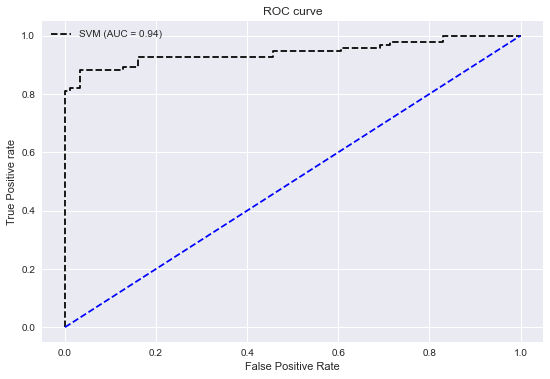

In [194]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='black', label='RT (AUC = %0.2f)' % auc_clf_1)
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DT (AUC = %0.2f)' % auc_clf_2)
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='SVM (AUC = %0.2f)' % auc_clf_3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Ensemble Model

## Bagging

### Bagging (DT base model)

In [195]:
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)

In [196]:
clf_bagging1 = BaggingClassifier(base_estimator=clf_2.best_estimator_, n_estimators=10, oob_score=True ,random_state=123)
clf_bagging1.fit(X_train, y_train)
y_pred_acc = clf_bagging1.predict(X_test)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

[[90  4]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        94
           1       0.96      1.00      0.98        94

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

-----------------------------------------------------


In [197]:
pred_prob4 = clf_bagging1.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
auc_clf_bagging1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_clf_bagging1

0.9900407424173834

### Bagging (SVM base model)

In [198]:
clf_bagging2 = BaggingClassifier(base_estimator=clf_3.best_estimator_, n_estimators=10, oob_score=True,random_state=123)
clf_bagging2.fit(X_train, y_train)
y_pred_acc = clf_bagging2.predict(X_test)

print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

[[84 10]
 [11 83]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        94
           1       0.89      0.88      0.89        94

    accuracy                           0.89       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.89      0.89      0.89       188

-----------------------------------------------------


In [199]:
pred_prob5 = clf_bagging2.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
auc_clf_bagging2 = roc_auc_score(y_test, pred_prob5[:,1])
auc_clf_bagging2

0.9438660027161611

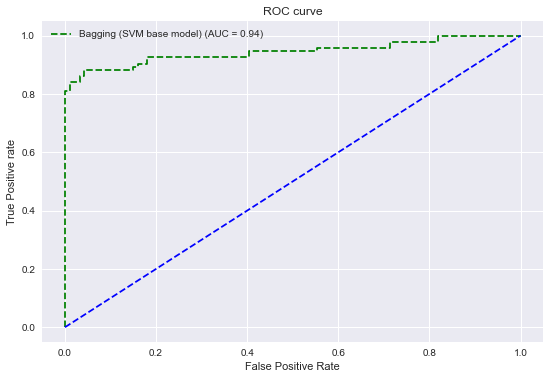

In [200]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='Bagging (DT base model) (AUC = %0.2f)' % auc_clf_bagging1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Bagging (SVM base model) (AUC = %0.2f)' % auc_clf_bagging2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Boosting

### Boosting (DT base model)

In [201]:
model= AdaBoostClassifier(base_estimator= clf_2.best_estimator_ , algorithm="SAMME" ,random_state=77)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

y_pred_acc = grid_result.predict(X_test)


In [202]:
print('Best parameters' ,grid_result.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'learning_rate': 1.0, 'n_estimators': 500}
[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [203]:
pred_prob6 = grid_result.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
auc_clf_boosting1 = roc_auc_score(y_test, pred_prob6[:,1])
auc_clf_boosting1

0.9998868266183794

In [204]:
grid_search.best_estimator_.feature_importances_

array([           nan,            nan, 4.36632544e-03,            nan,
       7.78833780e-02,            nan,            nan,            nan,
       1.78774539e-02, 1.07562249e-03, 2.55093471e-03, 1.52885138e-02,
       5.51717482e-03,            nan, 5.11119432e-03, 1.95277219e-03,
       2.33130041e-03, 1.30005379e-10, 3.60141371e-13, 7.66556127e-11,
       2.04006581e-03, 3.62370960e-03, 4.30204840e-03, 9.16194407e-04,
       1.38623124e-02, 5.56879595e-03, 3.39187626e-04, 1.87219796e-03,
       1.08631043e-07, 1.75575545e-07, 1.46427809e-04, 4.66962659e-07,
       5.76229321e-06, 2.39054853e-06, 6.78595889e-12, 7.87150479e-03,
       1.91939079e-02, 6.53513443e-03])

### Boosting (SVM base model)

In [205]:
model1 = AdaBoostClassifier(base_estimator= clf_3.best_estimator_ , algorithm="SAMME" ,random_state=123)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
y_pred_acc = grid_result.predict(X_test)


In [206]:
print('Best parameters' ,grid_result.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'learning_rate': 0.01, 'n_estimators': 500}
[[55 39]
 [ 9 85]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70        94
           1       0.69      0.90      0.78        94

    accuracy                           0.74       188
   macro avg       0.77      0.74      0.74       188
weighted avg       0.77      0.74      0.74       188

-----------------------------------------------------


In [207]:
pred_prob7 = grid_result.predict_proba(X_test)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
auc_clf_boosting2 = roc_auc_score(y_test, pred_prob7[:,1])
auc_clf_boosting2

0.8632865550022635

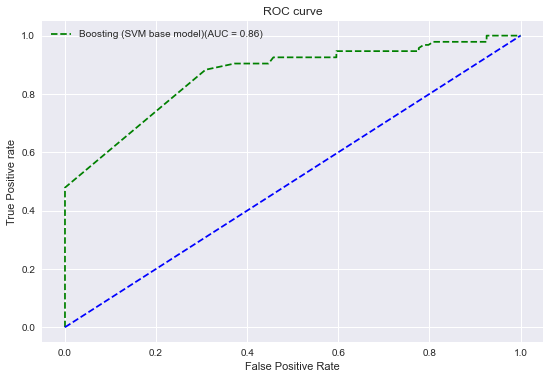

In [208]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Boosting (DT base model) (AUC = %0.2f)' % auc_clf_boosting1)
plt.plot(fpr7, tpr7, linestyle='--',color='green', label='Boosting (SVM base model)(AUC = %0.2f)' % auc_clf_boosting2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## RandomForestClassifier

In [209]:
rt = RandomForestClassifier(random_state=999)
clf_1 = GridSearchCV(rt,param_grid_rt, cv=cv , refit=True )
clf_1.fit(X_train , y_train)
y_pred_acc = clf_1.predict(X_test)
print('Best parameters' ,clf_1.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_split': 2}
[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [210]:
pred_prob1 = clf_1.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
auc_clf_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_clf_1



0.9998868266183794

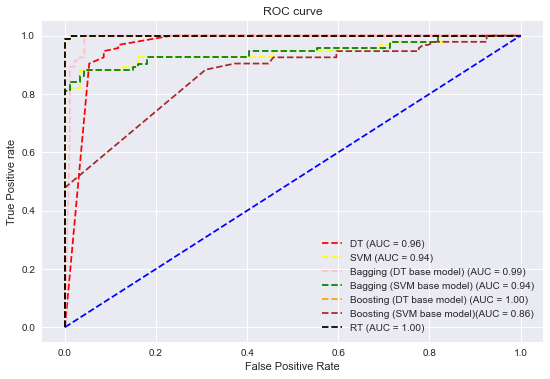

In [211]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='DT (AUC = %0.2f)' % auc_clf_2)
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='SVM (AUC = %0.2f)' % auc_clf_3)
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Bagging (DT base model) (AUC = %0.2f)' % auc_clf_bagging1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Bagging (SVM base model) (AUC = %0.2f)' % auc_clf_bagging2)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Boosting (DT base model) (AUC = %0.2f)' % auc_clf_boosting1)
plt.plot(fpr7, tpr7, linestyle='--',color='brown', label='Boosting (SVM base model)(AUC = %0.2f)' % auc_clf_boosting2)
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='RT (AUC = %0.2f)' % auc_clf_1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [212]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

In [213]:
forest_importances = pd.Series(clf_1.best_estimator_.feature_importances_, index=X_train.columns)
forest_importances.sort_values(ascending=False)

GPA                                                                        0.378430
ENTRYGPA                                                                   0.080958
FATHERINCOME                                                               0.061948
MOTHERINCOME                                                               0.060282
YEARMOTHER                                                                 0.052175
YEARFATHER                                                                 0.051781
COURSE_GRADE_STATISTICAL ANALYSIS I_F                                      0.036832
COURSE_GRADE_ELEMENTARY PHYSICS_F                                          0.034008
COURSE_GRADE_GENERAL CHEMISTRY LABORATORY_F                                0.023574
NumberOfSiblings                                                           0.020909
COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABORATORY_F                     0.020607
NumberOfSon                                                                0

In [214]:
data_fea = forest_importances[forest_importances.values > 0.01]
data_fea=data_fea.rename('Coefficient').reset_index().sort_values('Coefficient', ascending=False)
data_fea.to_csv(r'Feature importance case 1.csv' , encoding='utf-8-sig')
data_fea['index']


0                                                   GPA
1                                              ENTRYGPA
2                                          FATHERINCOME
4                                          MOTHERINCOME
5                                            YEARMOTHER
3                                            YEARFATHER
18                COURSE_GRADE_STATISTICAL ANALYSIS I_F
12                    COURSE_GRADE_ELEMENTARY PHYSICS_F
14          COURSE_GRADE_GENERAL CHEMISTRY LABORATORY_F
7                                      NumberOfSiblings
8     COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABO...
6                                           NumberOfSon
9           COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE_F
16          COURSE_GRADE_GENERAL PHYSICS LABORATORY I_F
13                             COURSE_GRADE_ENGLISH I_F
11       COURSE_GRADE_CALCULUS FOR PHYSICAL SCIENCE I_F
15                   COURSE_GRADE_GENERAL MATHEMATICS_F
10     COURSE_GRADE_CALCULUS  FOR PHYSICAL SCIEN

In [233]:
data_asd = pd.DataFrame(data_fea['index'].str.split('_', n=2,expand=True ))
data_asd[data_asd[0] != 'COURSE'][0].values

indices = data_asd[data_asd[0] != 'COURSE'][0].index
data_asd.loc[indices, 2] = data_asd[data_asd[0] != 'COURSE'][0].values

data_fea['Feature'] = data_asd[2]
data_fea


,index,Coefficient,Feature
0,GPA,0.378430,GPA
1,ENTRYGPA,0.080958,ENTRYGPA
2,FATHERINCOME,0.061948,FATHERINCOME
4,MOTHERINCOME,0.060282,MOTHERINCOME
5,YEARMOTHER,0.052175,YEARMOTHER
...,...,...,...
13,COURSE_GRADE_ENGLISH I_F,0.014096,ENGLISH I_F
11,COURSE_GRADE_CALCULUS FOR PHYSICAL SCIENCE I_F,0.013191,CALCULUS FOR PHYSICAL SCIENCE I_F
15,COURSE_GRADE_GENERAL MATHEMATICS_F,0.013107,GENERAL MATHEMATICS_F
10,COURSE_GRADE_CALCULUS FOR PHYSICAL SCIENCE II_F,0.012631,CALCULUS FOR PHYSICAL SCIENCE II_F


In [234]:
fig = px.bar(data_fea, x='Coefficient', y='Feature', text='Coefficient',  
             barmode='group', opacity=0.75)
fig.update_traces(texttemplate='%{text:,.3f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

fig.update_layout(title_text='feature importance DropOutALL', font_color='#28221D',
                  yaxis_title='Feature')
fig.show()

In [235]:
data_2564 = pd.read_csv('Data_2564_DropOutALL.csv', index_col=0)
data_2564.rename(columns={"บุตรคนที่": "NumberOfSon", "จำนวนพี่น้อง": "NumberOfSiblings"}, inplace=True)
data_2564.head()

,STATUSTEXT,GPA,ENTRYGPA,STUDENTSEX,FATHERINCOME,YEARFATHER,MOTHERINCOME,YEARMOTHER,NumberOfSon,NumberOfSiblings,...,COURSE_GRADE_HAPPINESS OF LIFE_F,COURSE_GRADE_INFORMATION LITERACY SKILLS_F,COURSE_GRADE_INTRODUCTION TO INFORMATION AND COMMUNICATION TECHNOLOGY_F,COURSE_GRADE_LEARNING SKILLS_F,COURSE_GRADE_LOCAL WISDOM_F,COURSE_GRADE_MEDITATION FOR LIFE DEVELOPMENT_F,COURSE_GRADE_MULTICULTURALISM_F,COURSE_GRADE_OPERATIONS RESEARCH_F,COURSE_GRADE_STATISTICAL ANALYSIS I_F,COURSE_GRADE_STATISTICAL MODEL_F
604,0,2.63,3.62,0,45000.0,52.0,14000.0,52.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,0,1.95,3.23,0,3000.0,55.0,9000.0,54.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0,2.45,3.05,0,40000.0,51.0,40000.0,49.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0,1.97,3.00,0,37210.0,46.0,22980.0,49.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0,3.24,3.50,0,15000.0,43.0,15000.0,43.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
data_2564['STATUSTEXT'].value_counts()

0    99
1     4
Name: STATUSTEXT, dtype: int64

In [237]:
data_2564.drop('STATUSTEXT',1,inplace=True)

In [238]:
data_2564.shape

(103, 38)

In [239]:
y_pred_acc = clf_1.predict(data_2564)
#print('Best parameters' ,clf_1.best_params_)
#print(confusion_matrix(y_test,y_pred_acc))
#print(classification_report(y_test,y_pred_acc))
#print('-----------------------------------------------------')

In [224]:
y_pred_acc

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [225]:
y_pred_case1 = pd.DataFrame(y_pred_acc)
y_pred_case1.to_csv(r'y_pred_case1.csv', encoding='utf-8-sig')